In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [37]:
# Load the dataset from the CSV file
df = pd.read_csv("/content/StudentPerformanceFactors.csv")

In [38]:
# Show how many row and column we have
df.shape

(6607, 20)

In [39]:
# Show first 10 data object
df.head(10)

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   
5             19          88               Medium              Medium   
6             29          84               Medium                 Low   
7             25          78                  Low                High   
8             17          94               Medium                High   
9             23          98               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   
5                        Yes            8               89           Medium   
6                        Yes            7               68              Low   
7                        Yes            6               50           Medium   
8                         No            6               80             High   
9                        Yes            8               71           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Yes                  0           Low          Medium   
1             Yes                  2        Medium          Medium   
2             Yes                  2        Medium          Medium   
3             Yes                  1        Medium          Medium   
4             Yes                  3        Medium            High   
5             Yes                  3        Medium          Medium   
6             Yes                  1           Low          Medium   
7             Yes                  1          High            High   
8             Yes                  0        Medium             Low   
9             Yes                  0          High            High   

  School_Type Peer_Influence  Physical_Activity Learning_Disabilities  \
0      Public       Positive                  3                    No   
1      Public       Negative                  4                    No   
2      Public        Neutral                  4                    No   
3      Public       Negative                  4                    No   
4      Public        Neutral                  4                    No   
5      Public       Positive                  3                    No   
6     Private        Neutral                  2                    No   
7      Public       Negative                  2                    No   
8     Private        Neutral                  1                    No   
9      Public       Positive                  5                    No   

  Parental_Education_Level Distance_from_Home  Gender  Exam_Score  
0              High School               Near    Male          67  
1                  College           Moderate  Female          61  
2             Postgraduate               Near    Male          74  
3              High School           Moderate    Male          71  
4                  College               Near  Female          70  
5             Postgraduate               Near    Male          71  
6              High School           Moderate    Male          67  
7              High School                Far    Male          66  
8                  College               Near    Male          69  
9              High School           Moderate    Male          72

In [40]:
# More info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [41]:
# Type conversion of values that appear numeric but are actually categorical

threshold = 10

for column in df.select_dtypes(include=['int64']).columns:
    if df[column].nunique() <= threshold:
        df[column] = df[column].astype('object')

In [42]:
# Type conversion of values that appear categorical but are actually numerical

threshold = 10

for column in df.select_dtypes(include=['object']).columns:
    if df[column].nunique() > threshold:
        df[column] = df[column].astype('int64')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   object
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   object
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [44]:
# Get descriptive statistics for numerical columns
df.describe()

Hours_Studied   Attendance  Previous_Scores   Exam_Score
count    6607.000000  6607.000000      6607.000000  6607.000000
mean       19.975329    79.977448        75.070531    67.235659
std         5.990594    11.547475        14.399784     3.890456
min         1.000000    60.000000        50.000000    55.000000
25%        16.000000    70.000000        63.000000    65.000000
50%        20.000000    80.000000        75.000000    67.000000
75%        24.000000    90.000000        88.000000    69.000000
max        44.000000   100.000000       100.000000   101.000000

# When we examine the minimum and maximum values, we see that the maximum value in the exam score is 101. Here we need to correct incorrect scores over 100.

In [46]:
# Check how many incorrect exam score values
df[df['Exam_Score'] > 100].shape[0]

1

In [47]:
# There is only one wrong exam score. We can remove that line from the data frame
df = df[df['Exam_Score'] <= 100]

In [48]:
# Check descriptive statistics for numerical columns again
df.describe()

Hours_Studied   Attendance  Previous_Scores   Exam_Score
count    6606.000000  6606.000000      6606.000000  6606.000000
mean       19.974266    79.974720        75.067817    67.230548
std         5.990424    11.546219        14.399184     3.868502
min         1.000000    60.000000        50.000000    55.000000
25%        16.000000    70.000000        63.000000    65.000000
50%        20.000000    80.000000        75.000000    67.000000
75%        24.000000    90.000000        88.000000    69.000000
max        44.000000   100.000000       100.000000   100.000000

In [63]:
# Get descriptive statistics for categorical columns
df.describe(include='object')

Parental_Involvement Access_to_Resources Extracurricular_Activities  \
count                  6606                6606                       6606   
unique                    3                   3                          2   
top                  Medium              Medium                        Yes   
freq                   3362                3318                       3937   

        Sleep_Hours Motivation_Level Internet_Access  Tutoring_Sessions  \
count          6606             6606            6606               6606   
unique            7                3               2                  9   
top               7           Medium             Yes                  1   
freq           1741             3351            6108               2179   

       Family_Income Teacher_Quality School_Type Peer_Influence  \
count           6606            6606        6606           6606   
unique             3               3           2              3   
top              Low          Medium      Public       Positive   
freq            2672            4003        4597           2637   

        Physical_Activity Learning_Disabilities Parental_Education_Level  \
count                6606                  6606                     6606   
unique                  7                     2                        3   
top                     3                    No              High School   
freq                 2544                  5911                     3312   

       Distance_from_Home Gender  
count                6606   6606  
unique                  3      2  
top                  Near   Male  
freq                 3951   3814

In [50]:
df.nunique()

Hours_Studied                 41
Attendance                    41
Parental_Involvement           3
Access_to_Resources            3
Extracurricular_Activities     2
Sleep_Hours                    7
Previous_Scores               51
Motivation_Level               3
Internet_Access                2
Tutoring_Sessions              9
Family_Income                  3
Teacher_Quality                3
School_Type                    2
Peer_Influence                 3
Physical_Activity              7
Learning_Disabilities          2
Parental_Education_Level       3
Distance_from_Home             3
Gender                         2
Exam_Score                    44
dtype: int64

In [52]:
# Check if categorical values ​​are entered properly

for categorical_value in cat_cols:
  print(categorical_value+" : ")
  print(df[categorical_value].unique())
  print("")

Parental_Involvement : 
['Low' 'Medium' 'High']

Access_to_Resources : 
['High' 'Medium' 'Low']

Extracurricular_Activities : 
['No' 'Yes']

Sleep_Hours : 
[7 8 6 10 9 5 4]

Motivation_Level : 
['Low' 'Medium' 'High']

Internet_Access : 
['Yes' 'No']

Tutoring_Sessions : 
[0 2 1 3 4 5 6 7 8]

Family_Income : 
['Low' 'Medium' 'High']

Teacher_Quality : 
['Medium' 'High' 'Low' nan]

School_Type : 
['Public' 'Private']

Peer_Influence : 
['Positive' 'Negative' 'Neutral']

Physical_Activity : 
[3 4 2 1 5 0 6]

Learning_Disabilities : 
['No' 'Yes']

Parental_Education_Level : 
['High School' 'College' 'Postgraduate' nan]

Distance_from_Home : 
['Near' 'Moderate' 'Far' nan]

Gender : 
['Male' 'Female']



All categorical values ​​are entered properly into the data set then we can continue data exploration

In [53]:
# Check for duplicated data object
df.duplicated().sum()

0

In [54]:
# Check for null values
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Teacher Quality, Parental_Education_Level and Distance_from_Home
have some null values.

All columns have missing values are categorical so we can fill the missing values with mode values.

In [66]:
# We should assign categorical and numerical columns to choose which filling method suitable for missing values
cat_cols = [col for col in df.columns if df[col].dtypes == "object"]
num_cols = [col for col in df.columns if col not in cat_cols]
print("Categorical Columns : ")
unique_values = df[cat_cols].apply(lambda x: x.unique())
print(unique_values)

Categorical Columns : 
Parental_Involvement                           [Low, Medium, High]
Access_to_Resources                            [High, Medium, Low]
Extracurricular_Activities                               [No, Yes]
Sleep_Hours                                 [7, 8, 6, 10, 9, 5, 4]
Motivation_Level                               [Low, Medium, High]
Internet_Access                                          [Yes, No]
Tutoring_Sessions                      [0, 2, 1, 3, 4, 5, 6, 7, 8]
Family_Income                                  [Low, Medium, High]
Teacher_Quality                                [Medium, High, Low]
School_Type                                      [Public, Private]
Peer_Influence                       [Positive, Negative, Neutral]
Physical_Activity                            [3, 4, 2, 1, 5, 0, 6]
Learning_Disabilities                                    [No, Yes]
Parental_Education_Level      [High School, College, Postgraduate]
Distance_from_Home                     

In [55]:
# Fill the missing values
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0], inplace=True)

In [56]:
# Check again if there is null values or not
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

# VISUALIZATION


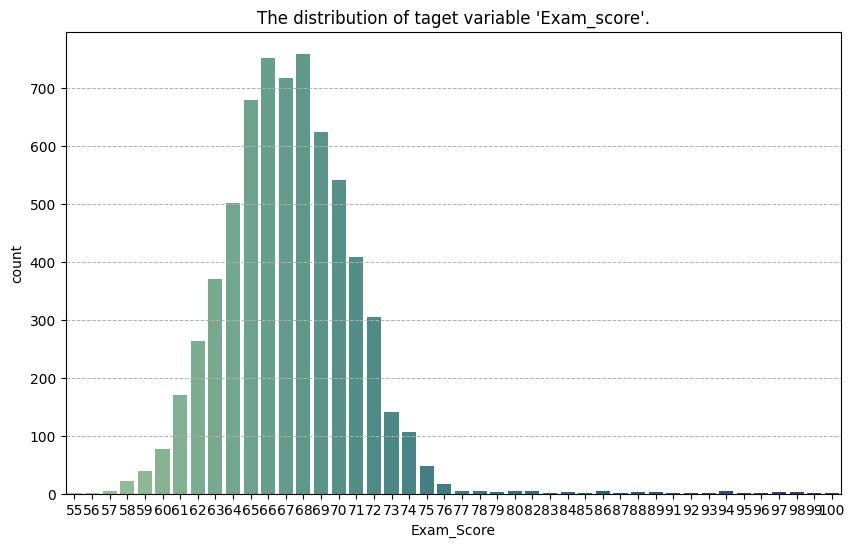

In [57]:
# Detailed distribution of target variable (Exam_score)
plt.figure(figsize=(10, 6))
sns.countplot(x=df["Exam_Score"], palette='crest')
# Note : Count plot is normally used to show categorical values, but I preferred to use it for this feature
# because I wanted to see each score in detail.
plt.title("The distribution of taget variable 'Exam_score'.")
plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)

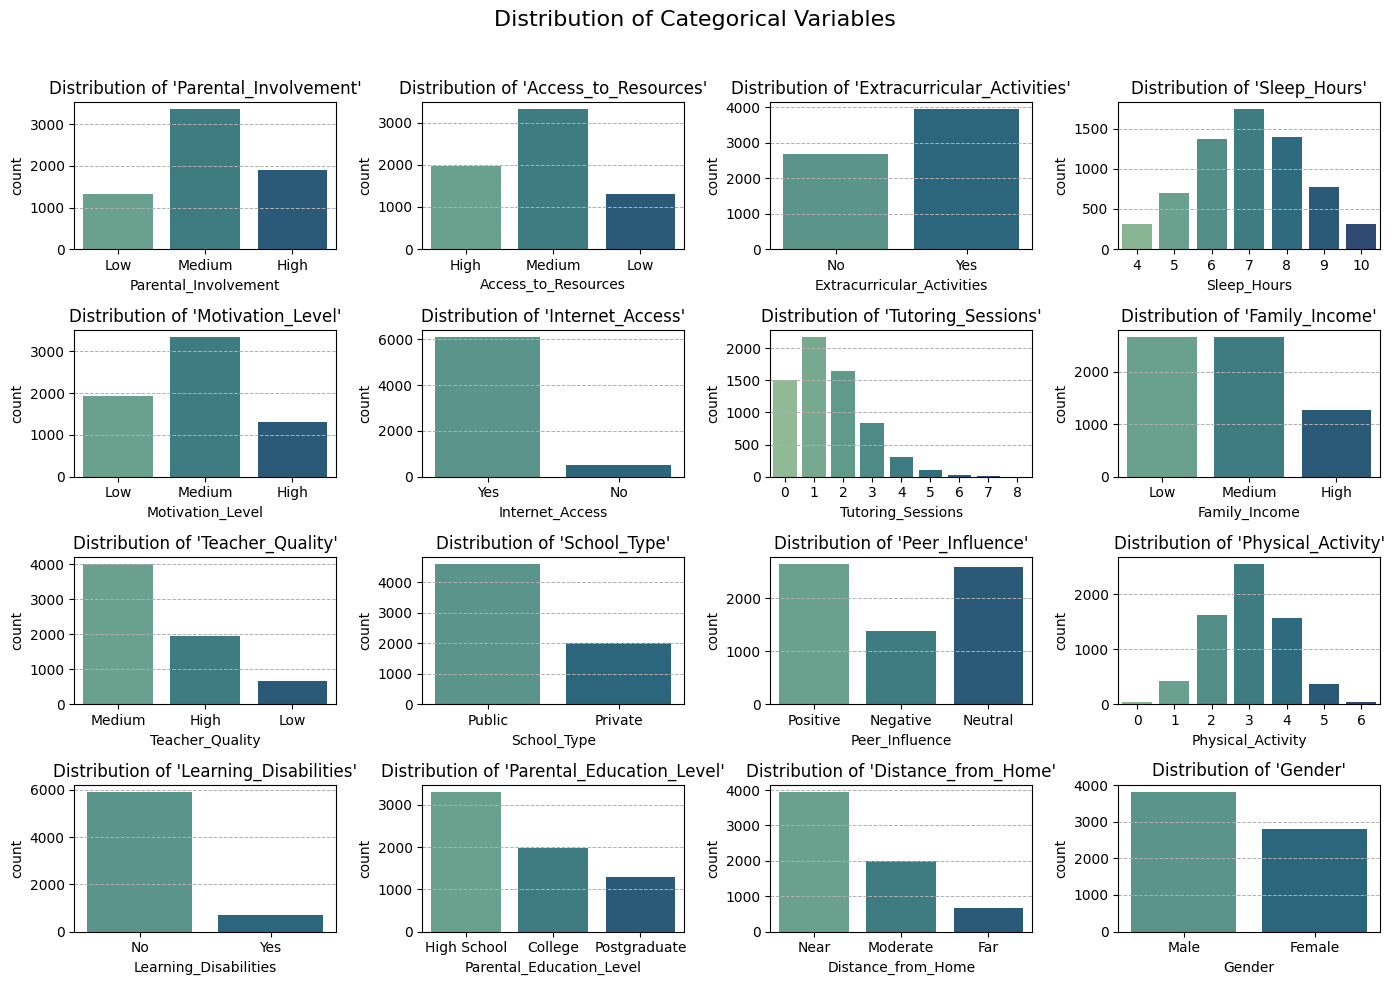

In [58]:
# Distribution of categorical features

# Set up the 2x2 grid layout
fig, axes = plt.subplots(4, 4, figsize=(14, 10))
fig.suptitle("Distribution of Categorical Variables", fontsize=16)

# Loop through the columns and plot each on the grid
for i, col in enumerate(cat_cols):
    row, col_index = divmod(i, 4)  # Determine the position in the 2x2 grid
    sns.countplot(x=df[col], palette='crest', ax=axes[row, col_index])
    axes[row, col_index].set_title(f"Distribution of '{col}'")
    axes[row, col_index].grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the main title
plt.show()

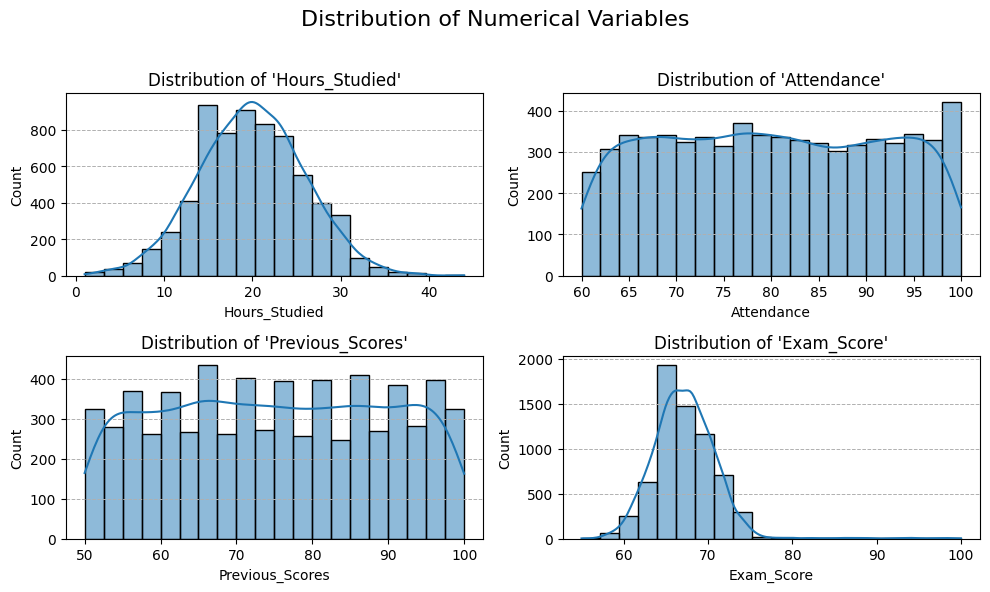

In [59]:
# Histogram of numerical features
fig , axes = plt.subplots(2,2,figsize=(10,6))
fig.suptitle("Distribution of Numerical Variables",fontsize=16)

for i,col in enumerate(num_cols):
  sns.histplot(x=df[col],ax=axes[i//2,i%2],kde=True, bins=20)
  axes[i//2,i%2].set_title(f"Distribution of '{col}'")
  axes[i//2,i%2].grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the main title
plt.show()

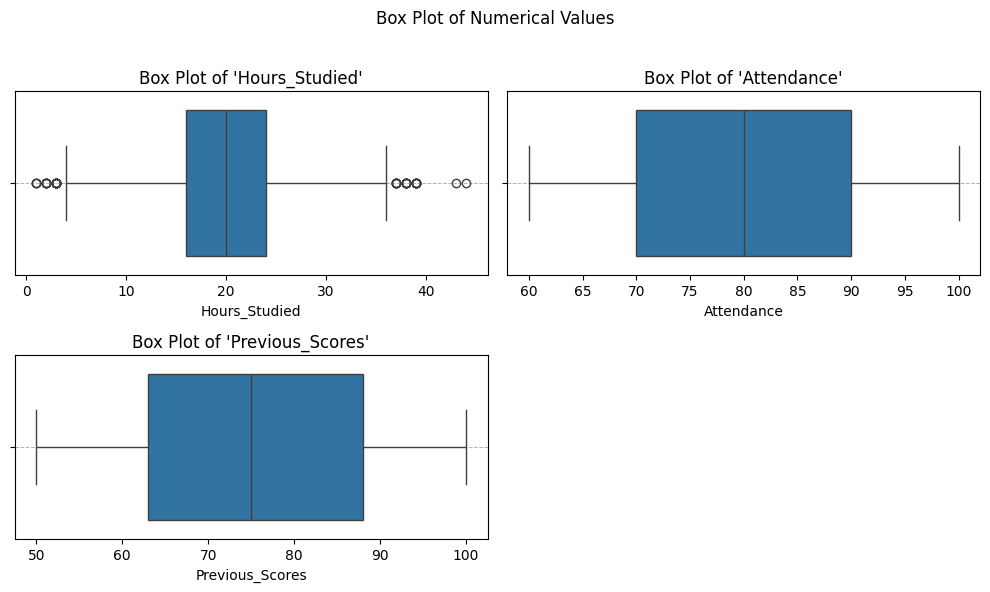

In [60]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle("Box Plot of Numerical Values")
for i, col in enumerate(num_cols):
    if col == "Exam_Score":
        axes[i // 2, i % 2].axis('off')
        continue  # Exam_Score'u atla
    sns.boxplot(x=df[col], ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f"Box Plot of '{col}'")
    axes[i // 2, i % 2].grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the main title
plt.show()

Violin plot is a more advanced version of box plot. In addition to the information shown by the box plot, it also gives us information about the density of the distribution.

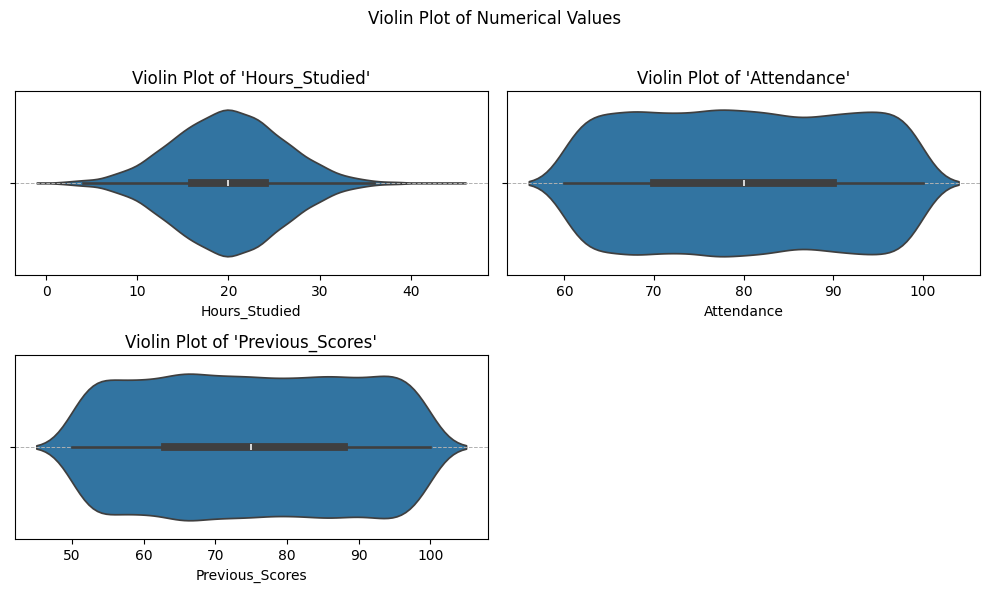

In [61]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle("Violin Plot of Numerical Values")

# Violin plot oluşturma
for i, col in enumerate(num_cols):
    if col == "Exam_Score":
        axes[i // 2, i % 2].axis('off')  # Exam_Score için ekseni kapat
        continue  # Exam_Score'u atla
    sns.violinplot(x=df[col], ax=axes[i // 2, i % 2])  # İlgili eksene çiz
    axes[i // 2, i % 2].set_title(f"Violin Plot of '{col}'")
    axes[i // 2, i % 2].grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ana başlık için düzen ayarlama
plt.show()

In [ ]:
# Scatter plot for relationship between exam score and categorical variables


# 📊 EXTRA : I found perfect package for data quality profiling and exploratory data analysis . We can get extra insights by checking it out.

In [ ]:
!pip install numba==0.53.1
!pip install ydata-profiling
!pip install visions --upgrade
!pip install ydata-profiling --upgrade

ERROR: Ignored the following versions that require a different python version: 0.52.0 Requires-Python >=3.6,<3.9; 0.52.0rc3 Requires-Python >=3.6,<3.9; 0.53.0 Requires-Python >=3.6,<3.10; 0.53.0rc1.post1 Requires-Python >=3.6,<3.10; 0.53.0rc2 Requires-Python >=3.6,<3.10; 0.53.0rc3 Requires-Python >=3.6,<3.10; 0.53.1 Requires-Python >=3.6,<3.10; 0.54.0 Requires-Python >=3.7,<3.10; 0.54.0rc2 Requires-Python >=3.7,<3.10; 0.54.0rc3 Requires-Python >=3.7,<3.10; 0.54.1 Requires-Python >=3.7,<3.10
ERROR: Could not find a version that satisfies the requirement numba==0.53.1 (from versions: 0.1, 0.2, 0.3, 0.5.0, 0.6.0, 0.7.0, 0.7.1, 0.7.2, 0.8.0, 0.8.1, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.12.2, 0.13.0, 0.13.2, 0.13.3, 0.13.4, 0.14.0, 0.15.1, 0.16.0, 0.17.0, 0.18.1, 0.18.2, 0.19.1, 0.19.2, 0.20.0, 0.21.0, 0.22.0, 0.22.1, 0.23.0, 0.23.1, 0.24.0, 0.25.0, 0.26.0, 0.27.0, 0.28.1, 0.29.0, 0.30.0, 0.30.1, 0.31.0, 0.32.0, 0.33.0, 0.34.0, 0.35.0, 0.36.1, 0.36.2, 0.37.0, 0.38.0, 0.38.1, 0.39

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]